You can find my simple linear regression implementation online here: 

https://github.com/tpalczew/linear_regression_from_scratch/blob/master/linear_regression_from_scratch.ipynb

So now we will try to code logistic regression for binary classification. 
So what's the difference as it sounds similar. 
The first algorithm is used for the regression and the second one for classification.
We can achive classification using activation function like for example sigmoid. 

$$sigmoid(z) = \frac{1}{1+e^{-z}}$$

So we had something like that for linear regression:

$
y = X\theta =
\left[
  \begin{array}{ccccc}
   1  & x_{1}^{1}  & x_{2}^{1} & ... & x_{n}^{1}  \\
   1  & x_{1}^{2}  & x_{2}^{2} & ... & x_{n}^{2}  \\
   ...  &  ... & ...  & ...  & ... \\
   1  & x_{1}^{m}  & x_{2}^{m} & ... & x_{n}^{m}  \\
  \end{array}
\right]
\begin{bmatrix}
           \beta_{0} \\
           \beta_{1} \\
           ... \\
           \beta_{n}
         \end{bmatrix}
$

and now we apply sigmoid to the output of the linear regression: 
$$ y = \sigma( X\theta  )$$

and we can call it hypothesis of the logistic regression - h 

and rewrite everything to the form shown below to folow typical naming in ML books:

$$ h(x) = \sigma( \theta^{T} X  )$$

and we see that 


$$ h(x) > 0.5  ~ if ~  \theta^{T} X > 0$$ and $$ h(x) < 0.5 ~ if ~  \theta^{T} X < 0 $$

in other words if weighted sum of inputes is larger than 0 we predict class 1. 





In [1]:
from copy import deepcopy
from random import randint
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [2]:
def linear_function(x , beta):
    return np.dot(x , beta)

In [3]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

In [4]:
def loss(yp, y):
    return (- y * np.log( yp ) - (1 - y) * np.log( 1 - yp )).mean()

In [5]:
def gradient(x, yp, y):
    return np.dot(x.T, (yp - y)) / y.size

In [6]:
def predict_probs(x, beta):
    return sigmoid( linear_function(x , beta) )

In [7]:
def predict(x, beta, threshold=0.5):
    print(predict_probs(x, beta))
    return predict_probs(x, beta) >= threshold

In [8]:
iris = load_iris()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.10, random_state=111)

In [10]:
# copy generated features and labels
x1, y1 = deepcopy(x_train), deepcopy(y_train)  # use deepcopy or x[:] , y[:]
x2, y2 = deepcopy(x_train), deepcopy(y_train)  # use deepcopy or x[:] , y[:]
x3, y3 = deepcopy(x_train), deepcopy(y_train)  # use deepcopy or x[:] , y[:]

In [11]:
x1 = x1[:, :2]
y1 = (y1 != 0) * 1

x2 = x2[:, :2]
y2 = (y2 != 0) * 1

x3 = x3[:, :2]
y3 = (y3 != 0) * 1

In [12]:
print(x1.shape)

(135, 2)


In [13]:
print(x1)

[[5.7 4.4]
 [6.2 2.8]
 [4.9 2.4]
 [5.  3.2]
 [6.7 3.1]
 [6.1 2.8]
 [6.4 3.1]
 [5.7 2.8]
 [5.8 2.7]
 [5.7 2.5]
 [5.1 3.3]
 [5.  3. ]
 [5.9 3.2]
 [4.7 3.2]
 [6.3 3.4]
 [4.6 3.6]
 [5.7 3. ]
 [4.6 3.2]
 [5.4 3.9]
 [6.7 3.1]
 [6.7 3. ]
 [7.1 3. ]
 [5.8 2.7]
 [4.4 2.9]
 [5.5 2.3]
 [5.  2. ]
 [6.6 2.9]
 [6.  3.4]
 [5.7 2.6]
 [7.2 3.2]
 [5.5 2.6]
 [6.9 3.1]
 [5.4 3.4]
 [5.1 3.8]
 [5.7 2.9]
 [5.1 2.5]
 [5.5 2.4]
 [6.  2.7]
 [5.7 3.8]
 [6.1 2.9]
 [4.5 2.3]
 [4.8 3.1]
 [4.9 2.5]
 [4.9 3.1]
 [5.3 3.7]
 [6.  3. ]
 [5.5 2.5]
 [5.9 3. ]
 [5.9 3. ]
 [5.4 3.9]
 [6.4 3.2]
 [7.7 3.8]
 [7.2 3. ]
 [5.2 3.5]
 [6.2 3.4]
 [5.1 3.8]
 [6.8 2.8]
 [6.4 2.7]
 [5.5 2.4]
 [6.9 3.2]
 [6.8 3.2]
 [6.6 3. ]
 [6.  2.2]
 [6.4 2.8]
 [6.1 2.8]
 [6.5 3. ]
 [5.  3.5]
 [7.7 3. ]
 [5.8 2.7]
 [5.2 4.1]
 [5.5 4.2]
 [6.3 2.3]
 [5.6 2.5]
 [6.1 2.6]
 [6.3 3.3]
 [4.6 3.1]
 [6.3 2.8]
 [5.6 2.8]
 [4.9 3. ]
 [5.6 2.9]
 [6.1 3. ]
 [6.3 2.5]
 [5.  2.3]
 [5.8 2.8]
 [6.5 3. ]
 [4.8 3. ]
 [5.6 2.7]
 [4.6 3.4]
 [5.8 2.6]
 [6.4 2.8]
 [6.5 3.2]

In [14]:
print(y1.shape)

(135,)


In [15]:
print(y1)

[0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1
 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1]


In [16]:
# add intercept 
intercept = np.ones((x1.shape[0], 1))
x1 = np.concatenate((intercept, x1), axis=1)

x2 = np.concatenate((intercept, x2), axis=1)

x3 = np.concatenate((intercept, x3), axis=1)

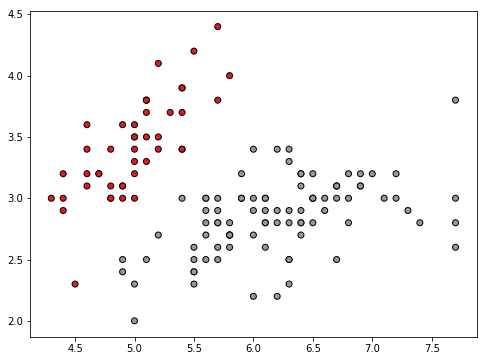

In [17]:
pyplot.figure(2, figsize=(8, 6))
pyplot.clf()
# Plot the training points
pyplot.scatter(x1[:, 1], x1[:, 2], c=y1, cmap=pyplot.cm.Set1, edgecolor='k')

In [18]:
# initialization 
beta = np.ones(len(x1[1]))
alpha = 0.001
iterations = 100000

In [19]:
def gradient_descent(x, y, beta, alpha, iterations):
    m = len(y)
    loss_history = np.zeros(iterations)
    
    for iteration in range(iterations):
        
        logit = predict_probs(x, beta)
        
        get_gradient = gradient(x, logit, y)
        
        beta = beta - alpha * get_gradient        
        
        get_loss = loss(y, logit)
        
        loss_history[iteration] = get_loss    
    
    return beta, loss_history

In [20]:
beta_gd, loss_gd = gradient_descent(x1, y1, beta, alpha, iterations)

/anaconda3/envs/Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


In [21]:
print(beta_gd)

[-0.08580656  2.8741823  -4.90095063]


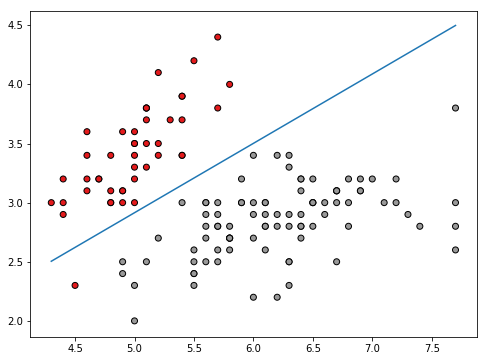

In [22]:
min_x1_1 = min(x1[:, 1])
max_x1_1 = max(x1[:, 1])


min_x1_2 = min(x1[:, 2])
max_x1_2 = max(x1[:, 2])


X_plot = np.linspace(min_x1_1, max_x1_1, 100)

pyplot.figure(2, figsize=(8, 6))
pyplot.clf()

pyplot.scatter(x1[:, 1], x1[:, 2], c=y1, cmap=pyplot.cm.Set1, edgecolor='k')

x_values = [np.min(x1[:, 1] ), np.max(x1[:, 1] )]
y_values = - (beta_gd[0] + np.dot(beta_gd[1], x_values)) / beta_gd[2]

pyplot.plot(x_values, y_values)

pyplot.show()

In [23]:
def shuffle(x,y):
    randp = randint(0, len(y)-1)
    return x[randp], y[randp]

In [24]:
def sgd(x, y, beta, alpha, iterations):
    m = len(y)
    loss_history = np.zeros(iterations)
    
    for iteration in range(iterations):
        
        onex, oney = shuffle(x, y)
        
        logit = predict_probs(onex, beta)
        
        get_gradient = gradient(onex, logit, oney)
        
        beta = beta - alpha * get_gradient        
        
        get_loss = loss(y, logit)
        
        loss_history[iteration] = get_loss    
    
    return beta, loss_history

In [25]:
# Stochastic Gradient Descent - small number of iterations
beta2 = np.ones(len(x1[1]))
alpha = 0.001
iterations2 = 10000

In [26]:
beta_sgd, cost_history_sgd = sgd(x2, y2, beta2, alpha, iterations2)

/anaconda3/envs/Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


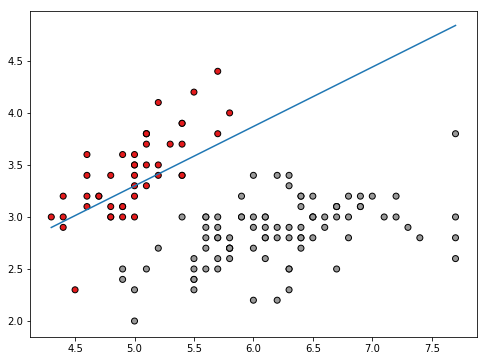

In [27]:
X_plot = np.linspace(min_x1_1, max_x1_1, 100)

pyplot.figure(2, figsize=(8, 6))
pyplot.clf()

pyplot.scatter(x2[:, 1], x2[:, 2], c=y1, cmap=pyplot.cm.Set1, edgecolor='k')

x_values = [np.min(x2[:, 1] ), np.max(x2[:, 1] )]
y_values = - (beta_sgd[0] + np.dot(beta_sgd[1], x_values)) / beta_sgd[2]

pyplot.plot(x_values, y_values)

pyplot.show()

/anaconda3/envs/Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


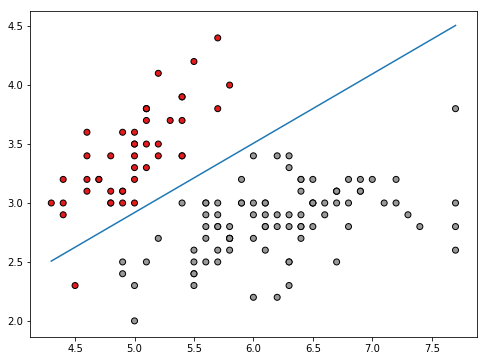

In [28]:
# Stochastic Gradient Descent - larger number of iterations
beta2 = np.ones(len(x1[1]))
alpha = 0.001
iterations2 = 100000
beta_sgd, cost_history_sgd = sgd(x2, y2, beta2, alpha, iterations2)
X_plot = np.linspace(min_x1_1, max_x1_1, 100)

pyplot.figure(2, figsize=(8, 6))
pyplot.clf()

pyplot.scatter(x2[:, 1], x2[:, 2], c=y1, cmap=pyplot.cm.Set1, edgecolor='k')

x_values = [np.min(x2[:, 1] ), np.max(x2[:, 1] )]
y_values = - (beta_sgd[0] + np.dot(beta_sgd[1], x_values)) / beta_sgd[2]

pyplot.plot(x_values, y_values)

pyplot.show()

In [29]:
# predict 
x_test = x_test[:, :2]
y_test = (y_test != 0) * 1
intercept = np.ones((x_test.shape[0], 1))
x_test = np.concatenate((intercept, x_test), axis=1)

predicted_test = predict(x_test, beta_sgd, threshold=0.5)

[0.11233817 0.08669624 0.95228039 0.99191006 0.98891951 0.05069899
 0.07199907 0.9898219  0.95362544 0.86682767 0.98250136 0.19685689
 0.9983292  0.95362544 0.99915865]


In [30]:
predicted_test = predicted_test * 1
print(predicted_test)

[0 0 1 1 1 0 0 1 1 1 1 0 1 1 1]


In [31]:
print(y_test)

[0 0 1 1 1 0 0 1 1 1 1 0 1 1 1]
